In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
import warnings
warnings.filterwarnings('ignore')


In [3]:
df = pd.read_csv('navrood.csv')

In [ ]:
df.head()

In [4]:
df.info

<bound method DataFrame.info of             Date    Qt-1      Pt      Qt
0     1994-09-24   2.170   0.000   2.170
1     1994-09-25   2.170   0.000   2.170
2     1994-09-26   2.170   0.000   2.170
3     1994-09-27   2.170   0.000   2.170
4     1994-09-28   2.170   0.000   2.100
...          ...     ...     ...     ...
9490  2020-09-17   2.421   5.935   1.970
9491  2020-09-18   1.970   0.164   1.850
9492  2020-09-19   1.850   0.000   1.740
9493  2020-09-20   1.740  68.355  15.000
9494  2020-09-21  15.000   5.109   0.935

[9495 rows x 4 columns]>

In [8]:
df['Date'].isnull().sum()
df['Qt-1'].isnull().sum()
df['Pt'].isnull().sum()
df['Qt'].isnull().sum()

0

In [4]:
df['Date'] = pd.to_datetime(df['Date'])

In [8]:
df.head()

,Date,Qt-1,Pt,Qt
0,1994-09-24,2.17,0.0,2.17
1,1994-09-25,2.17,0.0,2.17
2,1994-09-26,2.17,0.0,2.17
3,1994-09-27,2.17,0.0,2.17
4,1994-09-28,2.17,0.0,2.10


In [5]:
df['Year'] = df['Date'].apply(lambda x: x.year)
df['Month'] = df['Date'].apply(lambda x: x.month)
df['Day'] = df['Date'].apply(lambda x: x.day)
df = df.drop('Date' , axis=1)

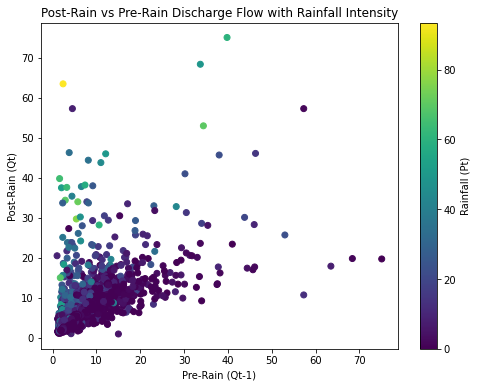

In [14]:
plt.figure(figsize=(8, 6))
scatter = plt.scatter(df['Qt-1'], df['Qt'], c=df['Pt'], cmap='viridis')
plt.colorbar(scatter, label='Rainfall (Pt)')
plt.xlabel('Pre-Rain (Qt-1)')
plt.ylabel('Post-Rain (Qt)')
plt.title('Post-Rain vs Pre-Rain Discharge Flow with Rainfall Intensity')
plt.show()

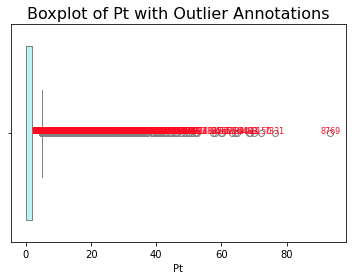

In [11]:
Q1 = df['Pt'].quantile(0.25)
Q3 = df['Pt'].quantile(0.75)
IQR = Q3 - Q1

outliers = df[(df['Pt'] < Q1 - 1.5*IQR) | (df['Pt'] > Q3 + 1.5*IQR)]

sns.boxplot(x=df['Pt'], color='#affcff')


for i in outliers.index:
    plt.text(df.loc[i, 'Pt'], 0, str(i), horizontalalignment='center', fontsize=8, color='#ff0a21')

plt.title('Boxplot of Pt with Outlier Annotations', fontsize=16)
plt.show()

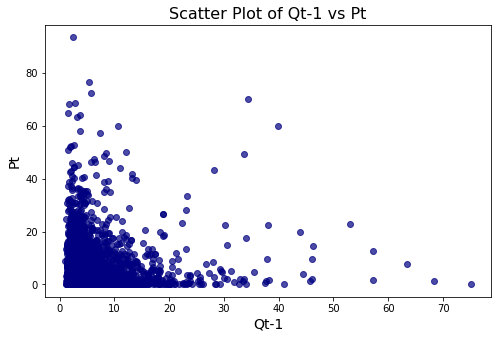

In [34]:
plt.figure(figsize=(8, 5))
plt.scatter(df['Qt-1'], df['Pt'], alpha=0.7, color='navy')
plt.title('Scatter Plot of Qt-1 vs Pt', fontsize=16)
plt.xlabel('Qt-1', fontsize=14)
plt.ylabel('Pt', fontsize=14)
plt.show()



A majority of the data points are clustered near the lower ranges of Qt-1 (0-20) and Pt (0-10). This suggests that smaller values are more frequent in both features.

There appears to be a negative correlation: as Qt-1 increases, the values of Pt tend to decrease. However, this relationship is not strictly linear.

In [ ]:
df.head

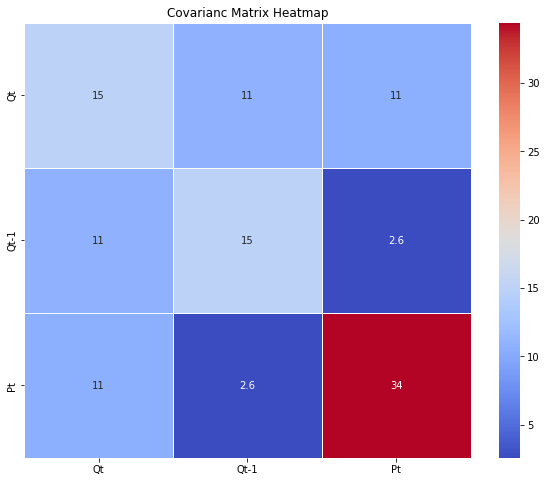

In [16]:
cov_matrix = df[['Qt', 'Qt-1', 'Pt']].cov()
plt.figure(figsize=(10, 8))
sns.heatmap(cov_matrix, annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Covarianc Matrix Heatmap')
plt.show()

In [19]:
corr_matrix = df[['Qt', 'Qt-1', 'Pt']].corr()
print("\nCorrelation Matrix:")
print(corr_matrix)


Correlation Matrix:
            Qt      Qt-1        Pt
Qt    1.000000  0.713803  0.464273
Qt-1  0.713803  1.000000  0.114413
Pt    0.464273  0.114413  1.000000


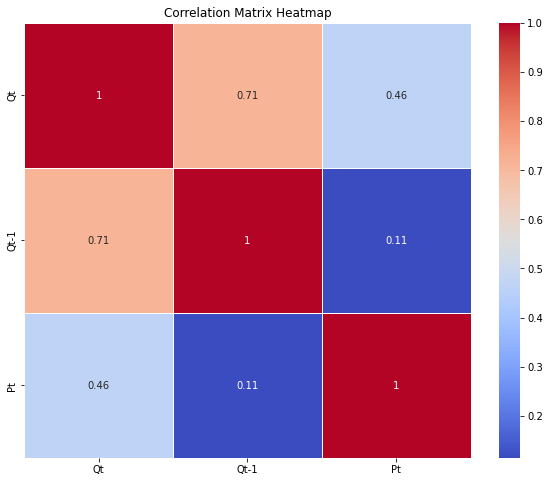

In [20]:
plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Correlation Matrix Heatmap')
plt.show()

 ‘Qt’ has a strong positive correlation with ‘Qt-1’ (0.71), indicating that as ‘Qt-1’ increases, ‘Qt’ also tends to increase. as it was expected...

In [6]:
def assign_season(month):
    if month in [12, 1, 2]:
        return '4'
    elif month in [3, 4, 5]:
        return '1'
    elif month in [6, 7, 8]:
        return '2'
    else:
        return '3'

In [7]:
df['Season'] = df['Month'].apply(assign_season)

In [23]:
df.head()

,Qt-1,Pt,Qt,Year,Month,Day,Season
0,2.17,0.0,2.17,1994,9,24,3
1,2.17,0.0,2.17,1994,9,25,3
2,2.17,0.0,2.17,1994,9,26,3
3,2.17,0.0,2.17,1994,9,27,3
4,2.17,0.0,2.10,1994,9,28,3


In [8]:
df['Season']=df['Season'].astype(int)

Average Rainfall by Season:
Season
1    2.262058
2    1.535610
3    3.621317
4    2.252412
Name: Pt, dtype: float64


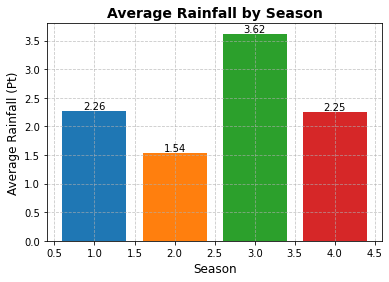

In [31]:
seasonal_rainfall = df.groupby('Season')['Pt'].mean()
print("Average Rainfall by Season:")
print(seasonal_rainfall)

#Plotting with enhancements
fig, ax = plt.subplots()
bars = ax.bar(seasonal_rainfall.index, seasonal_rainfall, color=['#1f77b4', '#ff7f0e', '#2ca02c', '#d62728'])

# Adding data labels
for bar in bars:
    yval = bar.get_height()
    ax.text(bar.get_x() + bar.get_width()/2, yval, round(yval, 2), ha='center', va='bottom')

# Customizing the plot
ax.set_title('Average Rainfall by Season', fontsize=14, fontweight='bold')
ax.set_xlabel('Season', fontsize=12)
ax.set_ylabel('Average Rainfall (Pt)', fontsize=12)
ax.grid(True, linestyle='--', alpha=0.7)

plt.show()

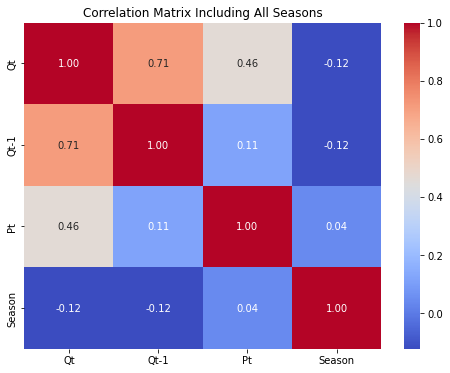

In [34]:
corr_matrix = df[['Qt', 'Qt-1', 'Pt','Season']].corr()
plt.figure(figsize=(8, 6))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Matrix Including All Seasons')
plt.show()

Since there’s a moderate linear relationship between Qt and the features, starting with a simple linear regression model is reasonable. We’ll also explore regularized linear regression (Ridge and Lasso) to handle potential multicollinearity.

Linear Regression: As our baseline model.

In [15]:
from sklearn.model_selection import KFold, cross_val_score
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

Using K-Fold Cross-Validation will help evaluate the model’s performance by dividing the dataset into multiple training and testing sets.

Linear Regression is used to predict Qt.KFold with 5 splits ensures the model is tested on different parts of the data.cross_val_score is used with negative mean squared error (scoring='neg_mean_squared_error'), and the square root is taken to get RMSE.

In [ ]:

from sklearn.linear_model import LinearRegression



X = df[['Qt-1', 'Pt', 'Season']].values
y = df['Qt'].values


# Initialize the model
model = LinearRegression()

# Set up K-Fold Cross-Validation with 5 splits
kf = KFold(n_splits=5, shuffle=True, random_state=42)
rmse_scores_L = []
r2_scores_L = []


for train_index, test_index in kf.split(X):
    X_train, X_test = X[train_index], X[test_index]
    y_train, y_test = y[train_index], y[test_index]
    
    # Train the model
    model.fit(X_train, y_train)
    
    # Predictions
    y_pred = model.predict(X_test)
    
    # Evaluation
    rmse = np.sqrt(mean_squared_error(y_test, y_pred))
    r2 = r2_score(y_test, y_pred)
    
    rmse_scores_L.append(rmse)
    r2_scores_L.append(r2)

# Calculate mean and standard deviation for RMSE and R² scores
mean_rmse = np.mean(rmse_scores_L)
std_rmse = np.std(rmse_scores_L)
mean_r2 = np.mean(r2_scores_L)
std_r2 = np.std(r2_scores_L)

# Display results
print("Linear Regression with Original Features:")
print(f"Mean RMSE: {mean_rmse:.4f}")
print(f"Standard Deviation of RMSE: {std_rmse:.4f}")
print(f"Mean R² Score: {mean_r2:.4f}")
print(f"Standard Deviation of R² Score: {std_r2:.4f}")


Linear Regression with Original Features:
Mean RMSE: 2.2367
Standard Deviation of RMSE: 0.3215
Mean R² Score: 0.6598
Standard Deviation of R² Score: 0.0171


trying all the above this time with polynomial features and standard scalling

In [ ]:

from sklearn.preprocessing import PolynomialFeatures



X1 = df[['Qt-1', 'Pt', 'Season']].values
y = df['Qt'].values

poly = PolynomialFeatures(degree=2, include_bias=False)
X_poly = poly.fit_transform(X1)


model = LinearRegression()


kf = KFold(n_splits=5, shuffle=True, random_state=42)
rmse_scores_L = []
r2_scores_L = []


for train_index, test_index in kf.split(X1):
    X1_train, X1_test = X1[train_index], X1[test_index]
    y_train, y_test = y[train_index], y[test_index]
    
    # Train the model
    model.fit(X1_train, y_train)
    
    # Predictions
    y_pred = model.predict(X1_test)
    
    # Evaluation
    rmse = np.sqrt(mean_squared_error(y_test, y_pred))
    r2 = r2_score(y_test, y_pred)
    
    rmse_scores_L.append(rmse)
    r2_scores_L.append(r2)


mean_rmse = np.mean(rmse_scores_L)
std_rmse = np.std(rmse_scores_L)
mean_r2 = np.mean(r2_scores_L)
std_r2 = np.std(r2_scores_L)

# Display simple Linear Regression with the Polynomial features added
print("Linear Regression Results with K-Fold Cross-Validation using polynomial feature:")
print(f"Mean RMSE: {mean_rmse:.4f}")
print(f"Standard Deviation of RMSE: {std_rmse:.4f}")
print(f"Mean R² Score: {mean_r2:.4f}")
print(f"Standard Deviation of R² Score: {std_r2:.4f}")


Linear Regression Results with K-Fold Cross-Validation using polynomial feature:
Mean RMSE: 2.2367
Standard Deviation of RMSE: 0.3215
Mean R² Score: 0.6598
Standard Deviation of R² Score: 0.0171


In [24]:

from sklearn.preprocessing import PolynomialFeatures
from sklearn.preprocessing import RobustScaler
from sklearn.preprocessing import StandardScaler



X1 = df[['Qt-1', 'Pt', 'Season']].values
y = df['Qt'].values

scaler = RobustScaler()
X_scaled = scaler.fit_transform(X1)

poly = PolynomialFeatures(degree=2, include_bias=False)
X_poly = poly.fit_transform(X_scaled)



model = LinearRegression()

kf = KFold(n_splits=5, shuffle=True, random_state=42)
rmse_scores_L = []
r2_scores_L = []


for train_index, test_index in kf.split(X1):
    X1_train, X1_test = X1[train_index], X1[test_index]
    y_train, y_test = y[train_index], y[test_index]
    
    # Train the model
    model.fit(X1_train, y_train)
    
    # Predictions
    y_pred = model.predict(X1_test)
    
    # Evaluation
    rmse = np.sqrt(mean_squared_error(y_test, y_pred))
    r2 = r2_score(y_test, y_pred)
    
    rmse_scores_L.append(rmse)
    r2_scores_L.append(r2)


mean_rmse = np.mean(rmse_scores_L)
std_rmse = np.std(rmse_scores_L)
mean_r2 = np.mean(r2_scores_L)
std_r2 = np.std(r2_scores_L)

# Display simple Linear Regression with the Polynomial features and Standard scallin added
print("Linear Regression Results with K-Fold Cross-Validation using polynomial feature and standard scaling:")
print(f"Mean RMSE: {mean_rmse:.4f}")
print(f"Standard Deviation of RMSE: {std_rmse:.4f}")
print(f"Mean R² Score: {mean_r2:.4f}")
print(f"Standard Deviation of R² Score: {std_r2:.4f}")


Linear Regression Results with K-Fold Cross-Validation using polynomial feature and standard scaling:
Mean RMSE: 2.2367
Standard Deviation of RMSE: 0.3215
Mean R² Score: 0.6598
Standard Deviation of R² Score: 0.0171


trying Rdige and Lasso this time with all the same changes

In [ ]:

from sklearn.linear_model import Lasso, Ridge
from sklearn.model_selection import GridSearchCV, KFold
from sklearn.metrics import r2_score, mean_squared_error


X = df[['Qt-1', 'Pt', 'Season']].values
y = df['Qt'].values


scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

poly = PolynomialFeatures(degree=2, include_bias=False)
X_poly = poly.fit_transform(X_scaled)

# Define models for L1 (Lasso) and L2 (Ridge) regularization
lasso = Lasso(max_iter=10000, random_state=42)
ridge = Ridge(max_iter=10000, random_state=42)

# Set up parameter grid for alpha (regularization strength)
param_grid = {'alpha': np.logspace(-4, 4, 50)}

# Cross-validation setup
cv = KFold(n_splits=5, shuffle=True, random_state=42)

# Grid search for Lasso
lasso_grid = GridSearchCV(lasso, param_grid, scoring='r2', cv=cv, n_jobs=-1)
lasso_grid.fit(X_poly, y)
lasso_best_model = lasso_grid.best_estimator_
lasso_best_alpha = lasso_grid.best_params_['alpha']

# Grid search for Ridge
ridge_grid = GridSearchCV(ridge, param_grid, scoring='r2', cv=cv, n_jobs=-1)
ridge_grid.fit(X_poly, y)
ridge_best_model = ridge_grid.best_estimator_
ridge_best_alpha = ridge_grid.best_params_['alpha']


lasso_cv_results = lasso_grid.cv_results_
ridge_cv_results = ridge_grid.cv_results_

# Best R^2 scores
lasso_best_r2 = lasso_grid.best_score_
ridge_best_r2 = ridge_grid.best_score_


print(f"Lasso Best Alpha: {lasso_best_alpha}")
print(f"Lasso Best R2: {lasso_best_r2:.4f}")

print(f"Ridge Best Alpha: {ridge_best_alpha}")
print(f"Ridge Best R2: {ridge_best_r2:.4f}")


y_pred_lasso = lasso_best_model.predict(X_poly)
y_pred_ridge = ridge_best_model.predict(X_poly)

print(f"Lasso RMSE: {np.sqrt(mean_squared_error(y, y_pred_lasso)):.4f}")
print(f"Ridge RMSE: {np.sqrt(mean_squared_error(y, y_pred_ridge)):.4f}")


Lasso Best Alpha: 0.05963623316594643
Lasso Best R2: 0.7222
Ridge Best Alpha: 232.99518105153672
Ridge Best R2: 0.7214
Lasso RMSE: 1.9858
Ridge RMSE: 1.9830


In [ ]:
from xgboost import XGBRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.preprocessing import StandardScaler, RobustScaler, PolynomialFeatures
from sklearn.model_selection import GridSearchCV, KFold
from sklearn.metrics import r2_score, mean_squared_error


X = df[['Qt-1', 'Pt','Season']].values
y = df['Qt'].values


scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

poly = PolynomialFeatures(degree=2, include_bias=False)
X_poly = poly.fit_transform(X_scaled)


kf = KFold(n_splits=5, shuffle=True, random_state=42)


xgb_model = XGBRegressor(
    n_estimators=100,
    learning_rate=0.1,
    max_depth=5,
    random_state=42
)

rf_model = RandomForestRegressor(
    n_estimators=100,
    max_depth=10,
    random_state=42
)

# Lists for scores
rmse_scores_xgb = []
r2_scores_xgb = []
rmse_scores_rf = []
r2_scores_rf = []

# Cross-validation for XGBoost
for train_index, test_index in kf.split(X_poly):
    X_train, X_test = X_poly[train_index], X_poly[test_index]
    y_train, y_test = y[train_index], y[test_index]
    
    xgb_model.fit(X_train, y_train)
    y_pred = xgb_model.predict(X_test)
    
    rmse = np.sqrt(mean_squared_error(y_test, y_pred))
    r2 = r2_score(y_test, y_pred)
    
    rmse_scores_xgb.append(rmse)
    r2_scores_xgb.append(r2)

# Calculate and print XGBoost results
mean_rmse_xgb = np.mean(rmse_scores_xgb)
std_rmse_xgb = np.std(rmse_scores_xgb)
mean_r2_xgb = np.mean(r2_scores_xgb)
std_r2_xgb = np.std(r2_scores_xgb)

print("XGBoost Results with 5-Fold CV, Polynomial Features and Standard Scaling:")
print(f"Mean RMSE: {mean_rmse_xgb:.4f}, Standard Deviation of RMSE: {std_rmse_xgb:.4f}")
print(f"Mean R² Score: {mean_r2_xgb:.4f}, Standard Deviation of R² Score: {std_r2_xgb:.4f}")

# Cross-validation for Random Forest
for train_index, test_index in kf.split(X_poly):
    X_train, X_test = X_poly[train_index], X_poly[test_index]
    y_train, y_test = y[train_index], y[test_index]
    
    rf_model.fit(X_train, y_train)
    y_pred = rf_model.predict(X_test)
    
    rmse = np.sqrt(mean_squared_error(y_test, y_pred))
    r2 = r2_score(y_test, y_pred)
    
    rmse_scores_rf.append(rmse)
    r2_scores_rf.append(r2)


mean_rmse_rf = np.mean(rmse_scores_rf)
std_rmse_rf = np.std(rmse_scores_rf)
mean_r2_rf = np.mean(r2_scores_rf)
std_r2_rf = np.std(r2_scores_rf)

print("\nRandom Forest Results with 5-Fold CV, Polynomial Features and Standard Scaling:")
print(f"Mean RMSE: {mean_rmse_rf:.4f}, Standard Deviation of RMSE: {std_rmse_rf:.4f}")
print(f"Mean R² Score: {mean_r2_rf:.4f}, Standard Deviation of R² Score: {std_r2_rf:.4f}")

XGBoost Results with 5-Fold CV, Polynomial Features and Standard Scaling:
Mean RMSE: 2.0503, Standard Deviation of RMSE: 0.3407
Mean R² Score: 0.7150, Standard Deviation of R² Score: 0.0266

Random Forest Results with 5-Fold CV, Polynomial Features and Standard Scaling:
Mean RMSE: 2.0322, Standard Deviation of RMSE: 0.3503
Mean R² Score: 0.7199, Standard Deviation of R² Score: 0.0296


In [11]:
from sklearn.model_selection import GridSearchCV

# XGBoost hyperparameter tuning
xgb_params = {
    'n_estimators': [100, 200, 300],
    'max_depth': [3, 4, 5, 6],
    'learning_rate': [0.01, 0.1, 0.3],
    'min_child_weight': [1, 3, 5],
    'subsample': [0.8, 0.9, 1.0]
}

xgb_model = XGBRegressor(random_state=42)
xgb_grid = GridSearchCV(xgb_model, xgb_params, cv=5, scoring='r2', n_jobs=-1)
xgb_grid.fit(X_poly, y)

# Print best parameters for XGBoost
print("Best XGBoost Parameters:", xgb_grid.best_params_)
best_xgb = xgb_grid.best_estimator_

# Random Forest hyperparameter tuning
rf_params = {
    'n_estimators': [100, 200, 300],
    'max_depth': [5, 10, 15, None],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'max_features': ['auto', 'sqrt']
}

rf_model = RandomForestRegressor(random_state=42)
rf_grid = GridSearchCV(rf_model, rf_params, cv=5, scoring='r2', n_jobs=-1)
rf_grid.fit(X_poly, y)

# Print best parameters for Random Forest
print("Best Random Forest Parameters:", rf_grid.best_params_)
best_rf = rf_grid.best_estimator_

Best XGBoost Parameters: {'learning_rate': 0.1, 'max_depth': 3, 'min_child_weight': 5, 'n_estimators': 100, 'subsample': 1.0}
Best Random Forest Parameters: {'max_depth': 10, 'max_features': 'sqrt', 'min_samples_leaf': 2, 'min_samples_split': 5, 'n_estimators': 300}


In [ ]:
X = df[['Qt-1', 'Pt', 'Season', 'Month', 'Year']].values  # 
y = df['Qt'].values

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)
poly = PolynomialFeatures(degree=2, include_bias=False)
X_poly = poly.fit_transform(X_scaled)


rmse_scores_xgb = []
r2_scores_xgb = []
rmse_scores_rf = []
r2_scores_rf = []


kf = KFold(n_splits=5, shuffle=True, random_state=42)

# XGBoost evaluation
for train_index, test_index in kf.split(X_poly):
    X_train, X_test = X_poly[train_index], X_poly[test_index]
    y_train, y_test = y[train_index], y[test_index]
    
    best_xgb.fit(X_train, y_train)
    y_pred = best_xgb.predict(X_test)
    
    rmse = np.sqrt(mean_squared_error(y_test, y_pred))
    r2 = r2_score(y_test, y_pred)
    
    rmse_scores_xgb.append(rmse)
    r2_scores_xgb.append(r2)

# Print XGBoost results
print("\nOptimized XGBoost Results:")
print(f"Mean RMSE: {np.mean(rmse_scores_xgb):.4f}, Std: {np.std(rmse_scores_xgb):.4f}")
print(f"Mean R² Score: {np.mean(r2_scores_xgb):.4f}, Std: {np.std(r2_scores_xgb):.4f}")


for train_index, test_index in kf.split(X_poly):
    X_train, X_test = X_poly[train_index], X_poly[test_index]
    y_train, y_test = y[train_index], y[test_index]
    
    best_rf.fit(X_train, y_train)
    y_pred = best_rf.predict(X_test)
    
    rmse = np.sqrt(mean_squared_error(y_test, y_pred))
    r2 = r2_score(y_test, y_pred)
    
    rmse_scores_rf.append(rmse)
    r2_scores_rf.append(r2)


print("\nOptimized Random Forest Results:")
print(f"Mean RMSE: {np.mean(rmse_scores_rf):.4f}, Std: {np.std(rmse_scores_rf):.4f}")
print(f"Mean R² Score: {np.mean(r2_scores_rf):.4f}, Std: {np.std(r2_scores_rf):.4f}")

# Feature importance for best model
if np.mean(r2_scores_xgb) > np.mean(r2_scores_rf):
    importances = best_xgb.feature_importances_
    model_name = "XGBoost"
else:
    importances = best_rf.feature_importances_
    model_name = "Random Forest"

# Get feature names after polynomial transformation
feature_names = poly.get_feature_names_out(['Qt-1', 'Pt', 'Season', 'Month', 'Year'])
importance_df = pd.DataFrame({'feature': feature_names, 'importance': importances})
importance_df = importance_df.sort_values('importance', ascending=False).head(10)

print(f"\nTop 10 Most Important Features ({model_name}):")
print(importance_df)


Optimized XGBoost Results:
Mean RMSE: 1.9925, Std: 0.3702
Mean R² Score: 0.7310, Std: 0.0416

Optimized Random Forest Results:
Mean RMSE: 1.9702, Std: 0.3675
Mean R² Score: 0.7378, Std: 0.0311

Top 10 Most Important Features (Random Forest):
        feature  importance
0          Qt-1    0.207133
5        Qt-1^2    0.181810
6       Qt-1 Pt    0.122470
1            Pt    0.073952
7   Qt-1 Season    0.065631
10         Pt^2    0.065237
12     Pt Month    0.062619
8    Qt-1 Month    0.057733
9     Qt-1 Year    0.035996
13      Pt Year    0.030702


Based on the feature importance results, we can see that Qt-1, Pt interactions with Month/Season, and Qt-1 with Pt are very influential. Let's try to improve further by:

Adding more temporal features and their interactions:



In [13]:
def create_advanced_features(df):
    # Original features
    df['Qt-1'] = df['Qt'].shift(1)
    df['Qt-2'] = df['Qt'].shift(2)
    df['Qt-3'] = df['Qt'].shift(3)
    
    # Rolling means with different windows
    df['Qt_roll_mean3'] = df['Qt'].rolling(window=3).mean()
    df['Qt_roll_mean6'] = df['Qt'].rolling(window=6).mean()
    df['Pt_roll_mean3'] = df['Pt'].rolling(window=3).mean()
    
    # Lag features for Pt
    df['Pt-1'] = df['Pt'].shift(1)
    df['Pt-2'] = df['Pt'].shift(2)
    
    # Seasonal interactions
    df['Season_Qt-1'] = df['Season'] * df['Qt-1']
    df['Season_Pt'] = df['Season'] * df['Pt']
    df['Month_Qt-1'] = df['Month'] * df['Qt-1']
    df['Month_Pt'] = df['Month'] * df['Pt']
    
    # Flow-Precipitation interactions
    df['Qt-1_Pt'] = df['Qt-1'] * df['Pt']
    df['Qt-1_Pt-1'] = df['Qt-1'] * df['Pt-1']
    
    # Rolling statistics
    df['Qt_roll_std3'] = df['Qt'].rolling(window=3).std()
    df['Pt_roll_std3'] = df['Pt'].rolling(window=3).std()
    
    return df.dropna()  # Remove rows with NaN values

# Create new dataset with advanced features
df_advanced = df.copy()
df_advanced = create_advanced_features(df_advanced)

In [ ]:
features = [
    'Qt-1', 'Qt-2', 'Qt-3', 
    'Pt', 'Pt-1', 'Pt-2',
    'Qt_roll_mean3', 'Qt_roll_mean6', 'Pt_roll_mean3',
    'Season_Qt-1', 'Season_Pt', 
    'Month_Qt-1', 'Month_Pt',
    'Qt-1_Pt', 'Qt-1_Pt-1',
    'Qt_roll_std3', 'Pt_roll_std3',
    'Season', 'Month'
]

X = df_advanced[features].values
y = df_advanced['Qt'].values


scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Optimized XGBoost parameters based on the previous results
xgb_model = XGBRegressor(
    n_estimators=300,
    max_depth=6,
    learning_rate=0.01,
    min_child_weight=3,
    subsample=0.9,
    random_state=42
)

kf = KFold(n_splits=5, shuffle=True, random_state=42)
rmse_scores = []
r2_scores = []

for train_index, test_index in kf.split(X_scaled):
    X_train, X_test = X_scaled[train_index], X_scaled[test_index]
    y_train, y_test = y[train_index], y[test_index]
    
    xgb_model.fit(X_train, y_train)
    y_pred = xgb_model.predict(X_test)
    
    rmse = np.sqrt(mean_squared_error(y_test, y_pred))
    r2 = r2_score(y_test, y_pred)
    
    rmse_scores.append(rmse)
    r2_scores.append(r2)


print("Advanced XGBoost Results:")
print(f"Mean RMSE: {np.mean(rmse_scores):.4f}, Std: {np.std(rmse_scores):.4f}")
print(f"Mean R² Score: {np.mean(r2_scores):.4f}, Std: {np.std(r2_scores):.4f}")


importances = xgb_model.feature_importances_
importance_df = pd.DataFrame({
    'feature': features,
    'importance': importances
})
importance_df = importance_df.sort_values('importance', ascending=False)

print("\nFeature Importances:")
print(importance_df.head(10))

Advanced XGBoost Results:
Mean RMSE: 1.0706, Std: 0.2157
Mean R² Score: 0.9215, Std: 0.0271

Feature Importances:
          feature  importance
10      Season_Pt    0.374825
6   Qt_roll_mean3    0.219969
3              Pt    0.087487
12       Month_Pt    0.057638
15   Qt_roll_std3    0.037452
13        Qt-1_Pt    0.031109
17         Season    0.026698
1            Qt-2    0.026046
16   Pt_roll_std3    0.022057
4            Pt-1    0.021764


Best Random Forest Parameters: {'max_depth': 10, 'max_features': 'sqrt', 'min_samples_leaf': 2, 'min_samples_split': 5, 'n_estimators': 300}


In [ ]:
features = [
    'Qt-1', 'Qt-2', 'Qt-3', 
    'Pt', 'Pt-1', 'Pt-2',
    'Qt_roll_mean3', 'Qt_roll_mean6', 'Pt_roll_mean3',
    'Season_Qt-1', 'Season_Pt', 
    'Month_Qt-1', 'Month_Pt',
    'Qt-1_Pt', 'Qt-1_Pt-1',
    'Qt_roll_std3', 'Pt_roll_std3',
    'Season', 'Month'
]

X = df_advanced[features].values
y = df_advanced['Qt'].values

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Optimized XGBoost parameters based on the previous results
Rf_model = RandomForestRegressor(
    n_estimators=300,
    max_depth=10,
    max_features= 'sqrt',
    min_samples_leaf= 2, 
    min_samples_split= 5, 
    
)


kf = KFold(n_splits=5, shuffle=True, random_state=42)
rmse_scores = []
r2_scores = []

for train_index, test_index in kf.split(X_scaled):
    X_train, X_test = X_scaled[train_index], X_scaled[test_index]
    y_train, y_test = y[train_index], y[test_index]
    
    Rf_model.fit(X_train, y_train)
    y_pred = Rf_model.predict(X_test)
    
    rmse = np.sqrt(mean_squared_error(y_test, y_pred))
    r2 = r2_score(y_test, y_pred)
    
    rmse_scores.append(rmse)
    r2_scores.append(r2)

print("Advanced Rf regressor Results:")
print(f"Mean RMSE: {np.mean(rmse_scores):.4f}, Std: {np.std(rmse_scores):.4f}")
print(f"Mean R² Score: {np.mean(r2_scores):.4f}, Std: {np.std(r2_scores):.4f}")


importances = Rf_model.feature_importances_
importance_df = pd.DataFrame({
    'feature': features,
    'importance': importances
})
importance_df = importance_df.sort_values('importance', ascending=False)

print("\nFeature Importances:")
print(importance_df.head(10))

Advanced Rf regressor Results:
Mean RMSE: 1.2364, Std: 0.1795
Mean R² Score: 0.8964, Std: 0.0255

Feature Importances:
          feature  importance
6   Qt_roll_mean3    0.234846
15   Qt_roll_std3    0.151415
0            Qt-1    0.133681
7   Qt_roll_mean6    0.108610
13        Qt-1_Pt    0.088574
1            Qt-2    0.053788
3              Pt    0.037334
10      Season_Pt    0.034651
12       Month_Pt    0.034271
9     Season_Qt-1    0.021122


In [ ]:
from sklearn.linear_model import Lasso, Ridge
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import KFold
import numpy as np
import pandas as pd

# Features and target
features = [
    'Qt-1', 'Qt-2', 'Qt-3', 
    'Pt', 'Pt-1', 'Pt-2',
    'Qt_roll_mean3', 'Qt_roll_mean6', 'Pt_roll_mean3',
    'Season_Qt-1', 'Season_Pt', 
    'Month_Qt-1', 'Month_Pt',
    'Qt-1_Pt', 'Qt-1_Pt-1',
    'Qt_roll_std3', 'Pt_roll_std3',
    'Season', 'Month'
]

X = df_advanced[features].values
y = df_advanced['Qt'].values

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)


lasso_model = Lasso(alpha=0.05963623316594643)
ridge_model = Ridge(alpha=232.99518105153672)

kf = KFold(n_splits=5, shuffle=True, random_state=42)


lasso_rmse_scores = []
lasso_r2_scores = []
ridge_rmse_scores = []
ridge_r2_scores = []

for train_index, test_index in kf.split(X_scaled):
    X_train, X_test = X_scaled[train_index], X_scaled[test_index]
    y_train, y_test = y[train_index], y[test_index]
    
    # Lasso
    lasso_model.fit(X_train, y_train)
    lasso_pred = lasso_model.predict(X_test)
    lasso_rmse = np.sqrt(mean_squared_error(y_test, lasso_pred))
    lasso_r2 = r2_score(y_test, lasso_pred)
    lasso_rmse_scores.append(lasso_rmse)
    lasso_r2_scores.append(lasso_r2)
    
    # Ridge
    ridge_model.fit(X_train, y_train)
    ridge_pred = ridge_model.predict(X_test)
    ridge_rmse = np.sqrt(mean_squared_error(y_test, ridge_pred))
    ridge_r2 = r2_score(y_test, ridge_pred)
    ridge_rmse_scores.append(ridge_rmse)
    ridge_r2_scores.append(ridge_r2)


print("Lasso Results:")
print(f"Mean RMSE: {np.mean(lasso_rmse_scores):.4f}, Std: {np.std(lasso_rmse_scores):.4f}")
print(f"Mean R² Score: {np.mean(lasso_r2_scores):.4f}, Std: {np.std(lasso_r2_scores):.4f}")

print("\nRidge Results:")
print(f"Mean RMSE: {np.mean(ridge_rmse_scores):.4f}, Std: {np.std(ridge_rmse_scores):.4f}")
print(f"Mean R² Score: {np.mean(ridge_r2_scores):.4f}, Std: {np.std(ridge_r2_scores):.4f}")

# Extract feature importances (coefficients)
lasso_coefficients = lasso_model.coef_
ridge_coefficients = ridge_model.coef_

# Create DataFrame for feature importances
lasso_importance_df = pd.DataFrame({
    'feature': features,
    'importance': lasso_coefficients
}).sort_values('importance', key=abs, ascending=False)

ridge_importance_df = pd.DataFrame({
    'feature': features,
    'importance': ridge_coefficients
}).sort_values('importance', key=abs, ascending=False)

print("\nTop Lasso Feature Importances:")
print(lasso_importance_df.head(10))

print("\nTop Ridge Feature Importances:")
print(ridge_importance_df.head(10))
 

Lasso Results:
Mean RMSE: 0.5898, Std: 0.0831
Mean R² Score: 0.9755, Std: 0.0095

Ridge Results:
Mean RMSE: 0.9036, Std: 0.1258
Mean R² Score: 0.9427, Std: 0.0220

Top Lasso Feature Importances:
          feature  importance
6   Qt_roll_mean3    6.873044
1            Qt-2   -2.859067
0            Qt-1   -1.458425
15   Qt_roll_std3    0.365034
12       Month_Pt    0.314934
14      Qt-1_Pt-1   -0.298331
11     Month_Qt-1   -0.219904
7   Qt_roll_mean6    0.058124
9     Season_Qt-1   -0.056847
13        Qt-1_Pt    0.045121

Top Ridge Feature Importances:
          feature  importance
6   Qt_roll_mean3    4.084991
1            Qt-2   -2.138625
15   Qt_roll_std3    0.982453
7   Qt_roll_mean6    0.941736
14      Qt-1_Pt-1   -0.548621
12       Month_Pt    0.428196
11     Month_Qt-1   -0.397788
13        Qt-1_Pt    0.311886
2            Qt-3   -0.250481
0            Qt-1   -0.185295


For a feature feature_i with coefficient βi\beta_iβi​:βi>0\beta_i > 0βi​>0: A unit increase in feature_i increases the predicted y by βi\beta_iβi​.βi<0\beta_i < 0βi​<0: A unit increase in feature_i decreases the predicted y by ∣βi∣|\beta_i|∣βi​∣.βi=0\beta_i = 0βi​=0: feature_i has no impact on the prediction (Lasso only).